# Skin Cancer
Skin cancer is the most common type of cancer. The most popular types of skin cancer are squamous cell carcinoma, basal cell carcinoma, and melanoma.  Although melanoma is not the most common it has the highest probabilty to invade nearby tissue and spread to other parts of the body.  This leads to melanoma responsible for the most amout of deaths out of all other skin cancers. 



Information from: https://www.cancer.gov/types/skin 

# The Goal 
The ultimate goal of this notebook is to help prevent and understand cancer.  Understanding certain health patterns that could be linked to skin cancer is the most import way to prevent cancer.  After analyzing health patterns I will create an image classifier to try to detect whether or not an image of the skin contains cancer or not.  

# Part 1 Understanding Trends
This data set is from kaggle.com. You can access the data via this link https://www.kaggle.com/datasets/antimoni/cancer-deaths-by-country-and-type-1990-2016/data

In [428]:
#imports 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
print("Version number of packages")
#print("TensorFlow v" + tf.__version__)
print("Seaborn v" + sns.__version__)
print("NumPy v" + np.__version__)
print("Pandas v" + pd.__version__)
#print("Sklearn v" + sklearn.__version__)
#print("SciPy v" + scipy.__version__)
print("MatPlotLib v" + mpl.__version__)

Version number of packages
Seaborn v0.12.2
NumPy v1.26.4
Pandas v2.0.3
MatPlotLib v3.7.3


In [483]:
df = pd.read_csv('cancer_deaths.csv')

df.head(5)

,Country,Code,Year,Liver cancer,Kidney cancer,Larynx cancer,Breast cancer,Thyroid cancer,Stomach cancer,Bladder cancer,...,Non-melanoma skin cancer,Lip and oral cavity cancer,Brain and nervous system cancer,"Tracheal, bronchus, and lung cancer",Gallbladder and biliary tract cancer,Malignant skin melanoma,Leukemia,Hodgkin lymphoma,Multiple myeloma,Other cancers
0,Afghanistan,AFG,1990,243.663716,39.470495,109.334207,766.535431,79.820167,923.495208,148.139204,...,26.446156,53.599636,163.869062,797.265710,125.936240,14.293978,727.763429,191.367386,50.719442,294.839679
1,Afghanistan,AFG,1991,261.241824,41.376024,117.311719,823.233932,85.111020,989.709648,156.977412,...,28.275271,57.148890,174.183219,853.126362,133.781377,15.241048,766.040181,203.509622,54.317640,311.469065
2,Afghanistan,AFG,1992,284.443630,44.106315,128.071634,901.022100,92.240603,1078.459037,168.990462,...,30.718152,61.876100,188.382296,927.812846,144.287648,16.508833,820.956547,220.208033,59.144200,334.565964
3,Afghanistan,AFG,1993,313.136816,47.424854,141.429604,996.432762,101.206726,1192.064525,184.347737,...,33.835442,67.504857,205.250430,1017.964700,157.471005,18.038507,891.134162,240.718821,64.938582,362.486749
4,Afghanistan,AFG,1994,343.229715,50.710951,155.754606,1097.895223,110.679923,1316.505674,200.246949,...,37.103370,73.175879,222.383572,1110.997186,171.311262,19.606636,965.286072,262.324068,70.930355,390.334685


In [484]:
df.columns

Index(['Country', 'Code', 'Year', 'Liver cancer ', 'Kidney cancer ',
       'Larynx cancer ', 'Breast cancer ', 'Thyroid cancer ',
       'Stomach cancer ', 'Bladder cancer ', 'Uterine cancer ',
       'Ovarian cancer ', 'Cervical cancer ', 'Prostate cancer ',
       'Pancreatic cancer ', 'Esophageal cancer ', 'Testicular cancer ',
       'Nasopharynx cancer ', 'Other pharynx cancer ',
       'Colon and rectum cancer ', 'Non-melanoma skin cancer ',
       'Lip and oral cavity cancer ', 'Brain and nervous system cancer ',
       'Tracheal, bronchus, and lung cancer ',
       'Gallbladder and biliary tract cancer ', 'Malignant skin melanoma ',
       'Leukemia ', 'Hodgkin lymphoma ', 'Multiple myeloma ',
       'Other cancers '],
      dtype='object')

In [485]:
melonma_col = 'Malignant skin melanoma '
other_skin_col ='Non-melanoma skin cancer '


melonma = df[melonma_col]
other_skin = df[other_skin_col]


#setting up the world col


world_df = df[df[melonma_col]>20000]

world_years = world_df['Year']



world_melonma = world_df[melonma_col]
world_other_skin = world_df[other_skin_col]

#setting up the US col


us_df = df[df['Country']=='North America']

us_years = us_df['Year']



us_melonma = us_df[melonma_col]
us_other_skin = us_df[other_skin_col]

In [490]:

world_and_us_df = pd.DataFrame(df)#, columns=columns)
world_and_us_df.reset_index(inplace=True)




world_and_us_df = world_and_us_df[world_and_us_df['Country'] == 'North America']


columns = ['Year',melonma_col]#, other_skin_col]

world_and_us_df = pd.DataFrame(world_and_us_df, columns=columns)


#temp = world_and_us_df.set_index('melonma_col')

In [492]:
def get_us_skin_cancer_count_deaths(year):
    temp = us_df[us_df['Year'] == year]

    ans = temp[melonma_col].values[0], temp[other_skin_col].values[0]
    
    final_ans = list(ans)
    
    #print(final_ans)
    
    return final_ans

def get_world_skin_cancer_count_deaths(year):
    temp = world_df[world_df['Year'] == year]

    ans = temp[melonma_col].values[0], temp[other_skin_col].values[0]
    
    final_ans = list(ans)
    
    #print(final_ans)
    
    return final_ans



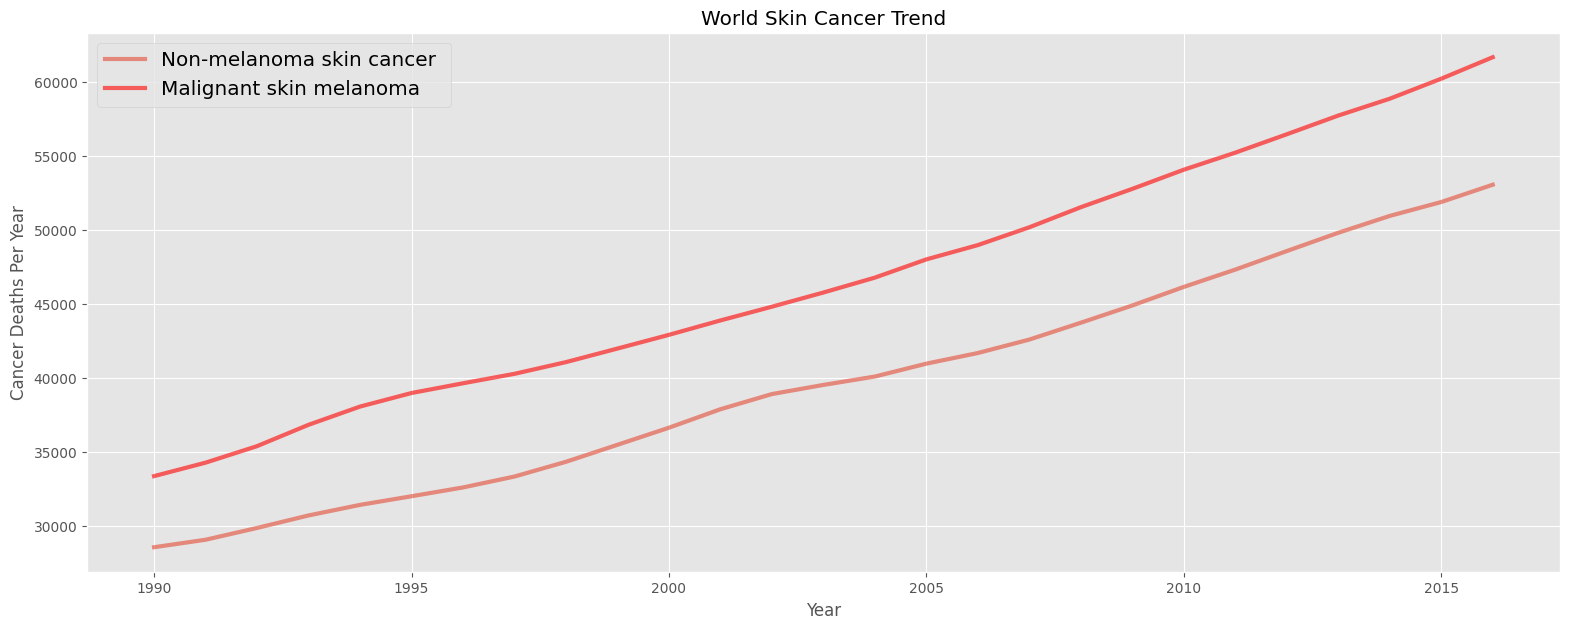

In [493]:
plt.figure(figsize = (19,7))

plt.plot(world_years, world_other_skin, label = other_skin_col, lw=3, alpha = .6)
plt.plot(world_years,world_melonma, label = melonma_col,c = 'r', lw =3, alpha = .6)
plt.legend(fontsize = 'x-large')
plt.xlabel('Year')
plt.ylabel('Cancer Deaths Per Year')
plt.title('World Skin Cancer Trend')
plt.xticks()
           
plt.show()

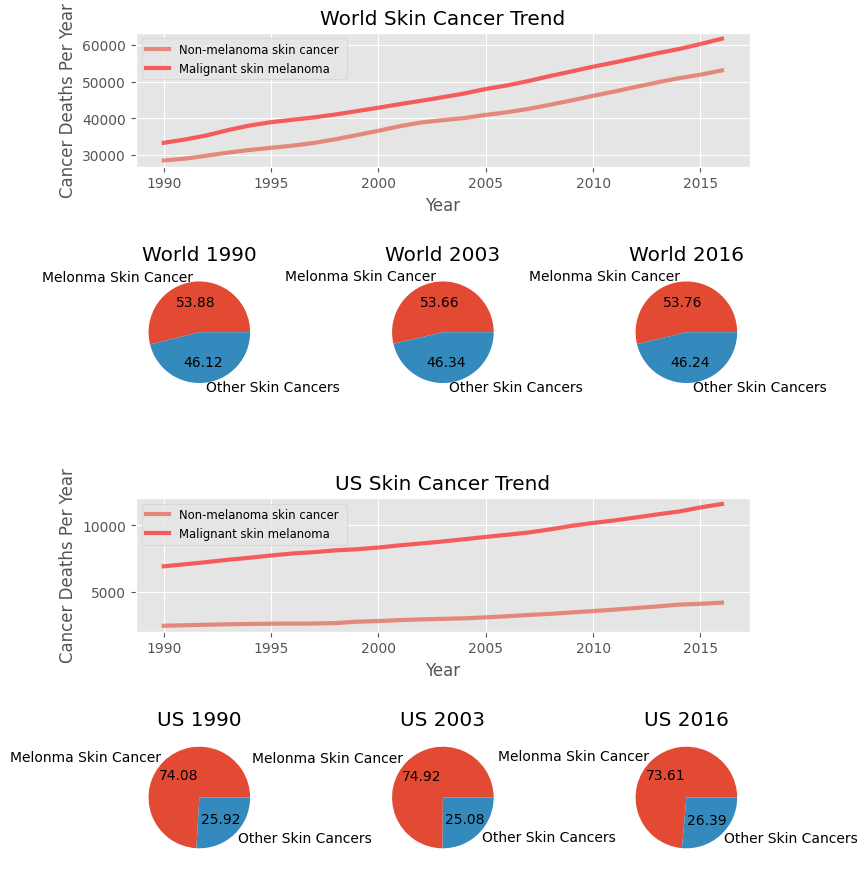

In [494]:
#subplot mosaic

plt.style.use('ggplot')

X = [['L1', 'L1', 'L1'],
     ['WP1', 'WP2','WP3'],
    ['L2','L2','L2'],
     ['USP1', 'USP2','USP3'],]



FIGSIZE = 10


fig, ax = plt.subplot_mosaic(X, figsize = (FIGSIZE-2,FIGSIZE))

fig.tight_layout(pad = 5)
    

#making the world line graph
ax['L1'].plot(world_years, world_other_skin, label = other_skin_col, lw=3, alpha = .6)
ax['L1'].plot(world_years,world_melonma, label = melonma_col,c = 'r', lw =3, alpha = .6)
ax['L1'].legend(fontsize = 'small')
ax['L1'].set_xlabel('Year')
ax['L1'].set_ylabel('Cancer Deaths Per Year')
ax['L1'].set_title('World Skin Cancer Trend')


#setting up our pie plots 
min_year = int(min(df['Year'])) #1990
median_year = int(np.median(df['Year'], axis=0)) #2003
max_year = int(max(df['Year'])) #2016

labels = ['Melonma Skin Cancer', 'Other Skin Cancers']


#pie plots world
ax['WP1'].pie(get_world_skin_cancer_count_deaths(min_year), autopct = '%.2f', labels =  labels)
ax['WP1'].set_title('World %s' % str(min_year))

ax['WP2'].pie(get_world_skin_cancer_count_deaths(median_year),autopct = '%.2f',labels =  labels)
ax['WP2'].set_title('World %s' % str(median_year))

ax['WP3'].pie(get_world_skin_cancer_count_deaths(max_year),autopct = '%.2f',labels =  labels)
ax['WP3'].set_title('World %s' % str(max_year))










#violin plot
#temp_df = world_df.loc[:,melonma_col]

#sns.violinplot(data= temp, x = 'Year', y = 'Malignant skin melanoma ', inner="point", ax = ax['V1'])

#sns.violinplot(data=us_df, x = 'Year',y=melonma_col, inner="stick", ax = ax['V2'])






#making the US line graph
ax['L2'].plot(us_years, us_other_skin, label = other_skin_col, lw=3, alpha = .6)
ax['L2'].plot(us_years,us_melonma, label = melonma_col,c = 'r', lw =3, alpha = .6)
ax['L2'].legend(fontsize = 'small')
ax['L2'].set_xlabel('Year')
ax['L2'].set_ylabel('Cancer Deaths Per Year')
ax['L2'].set_title('US Skin Cancer Trend')



#pie plots US
ax['USP1'].pie(get_us_skin_cancer_count_deaths(min_year), autopct = '%.2f', labels =  labels)
ax['USP1'].set_title('US %s' % str(min_year))

ax['USP2'].pie(get_us_skin_cancer_count_deaths(median_year),autopct = '%.2f',labels =  labels)
ax['USP2'].set_title('US %s' % str(median_year))

ax['USP3'].pie(get_us_skin_cancer_count_deaths(max_year),autopct = '%.2f',labels =  labels)
ax['USP3'].set_title('US %s' % str(max_year))




#entire mosaic title
#plt.suptitle("World Cancer Tred vs. US Trend", fontsize = 'x-large')

plt.show()


## Part 2: Cancer Prevention
The first dataset used is about the health patterns of Americans.  The dataset was created by the Centers for Disease Control and Prevention (CDC).  The dataset was based on telephone surveys and it aims to get the most popular health-related risk behaviors. 

Data set from Kaggle: https://www.kaggle.com/datasets/hassaneskikri/brfss-samplecsv/data 

In [495]:
#loading in the dataset

df = pd.read_csv("Data/BRFSS_sample.csv")

df.head(5)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,0,0.0,No,Female,65-69,White,No,Yes,Good,6.0,No,No,No
1,No,No,No,No,3,0.0,No,Female,35-39,Black,No,No,Very good,6.0,Yes,No,No
2,No,No,No,No,10,23.0,No,Female,18-24,White,No,Yes,Very good,6.0,Yes,No,No
3,No,No,No,No,0,0.0,No,Female,50-54,Hispanic,Yes,Yes,Fair,6.0,No,No,No
4,No,Yes,No,No,0,0.0,No,Male,60-64,White,No,No,Good,7.0,No,No,No


In [496]:
df.describe()

,PhysicalHealth,MentalHealth,SleepTime
count,68796.000000,68795.000000,68795.000000
mean,3.351241,3.926594,7.097900
std,7.936026,7.983287,1.436809
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,6.000000
50%,0.000000,0.000000,7.000000
75%,2.000000,3.000000,8.000000
max,30.000000,30.000000,24.000000


In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68796 entries, 0 to 68795
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      68796 non-null  object 
 1   Smoking           68796 non-null  object 
 2   AlcoholDrinking   68796 non-null  object 
 3   Stroke            68796 non-null  object 
 4   PhysicalHealth    68796 non-null  int64  
 5   MentalHealth      68795 non-null  float64
 6   DiffWalking       68795 non-null  object 
 7   Sex               68795 non-null  object 
 8   AgeCategory       68795 non-null  object 
 9   Race              68795 non-null  object 
 10  Diabetic          68795 non-null  object 
 11  PhysicalActivity  68795 non-null  object 
 12  GenHealth         68795 non-null  object 
 13  SleepTime         68795 non-null  float64
 14  Asthma            68795 non-null  object 
 15  KidneyDisease     68795 non-null  object 
 16  SkinCancer        68795 non-null  object

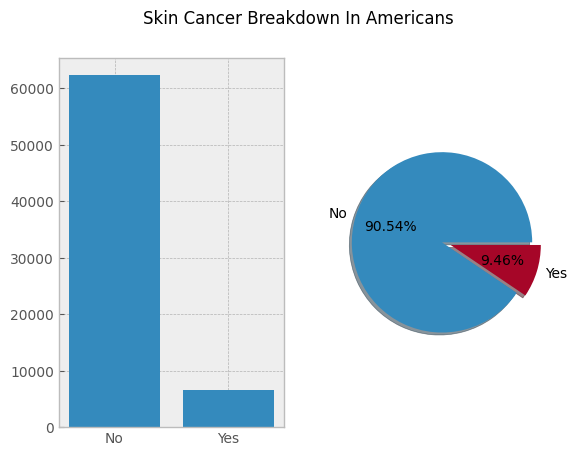

In [498]:
#setting a matplotlib style to all graphs 
plt.style.use('bmh')
              
#setting up data for the bar chart
ser = df['SkinCancer'].value_counts()

#setting up data for the pie chart

labels = ['No', 'Yes']
explode = (0, .1)

#creating a plot
fig, ax = plt.subplots(1,2)

#plotting a histogram
ax[0].bar(ser.index, ser.values)


#plotting a pie chart
ax[1].pie(ser,autopct='%.2f%%', labels = labels, explode = explode, shadow = True)

#adding a title
fig.suptitle("Skin Cancer Breakdown In Americans")

#showing figure
plt.show()

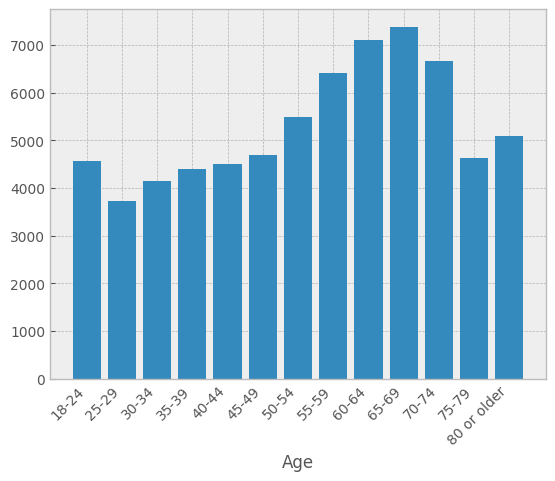

In [499]:
#setting up data for the bar chart
ser = df['AgeCategory'].value_counts()

#sorting by age 
ser.sort_index(axis=0, ascending=True, inplace=True)




#creating a plot
plt.figure()
plt.bar(ser.index, ser.values)
plt.xticks(rotation = 45, ha='right')
plt.xlabel("Age")
plt.show()

In [368]:
def get_dict_to_encode_to_numeric(df, col_name):
    
    ser = df[col_name].value_counts().sort_index()
    list_sorted = list(ser.index)
    
    my_dict = {}
    
    print("\n",col_name,':')
    for i, name in enumerate(list_sorted):
        
        print(i,name)
        
        my_dict.update({name: i})
        
      
    #print(my_dict)
        
    return my_dict
    
   
    




### Mann Whitney-U (age vs. skin cancer)

In [80]:
#running the test

xval_mwu = df_for_corr['SkinCancer']
yval_mwu = df_for_corr['AgeCategory']

res = stats.mannwhitneyu(xval_mwu,yval_mwu)

#comparies ranks with median distribution
#not normal distributions
#print(res)

print("The P-Value for the Mann Whitney-U test is {0:.4f}".format(res.pvalue))

The P-Value for the Mann Whitney-U test is 0.0000


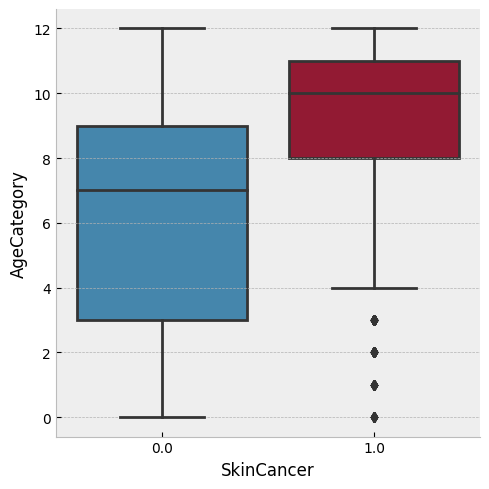

In [25]:


sns.catplot(data = df_for_corr, x = 'SkinCancer' , y =  'AgeCategory', kind = 'box')
plt.show()

### Chi-square test

In [26]:
contingency_skincancer_smoking = pd.crosstab(df['SkinCancer'], df['Smoking'], margins = True)

contingency_skincancer_smoking.head()


Smoking,No,Yes,All
SkinCancer,,,
No,37071,25219,62290
Yes,3490,3015,6505
All,40561,28234,68795


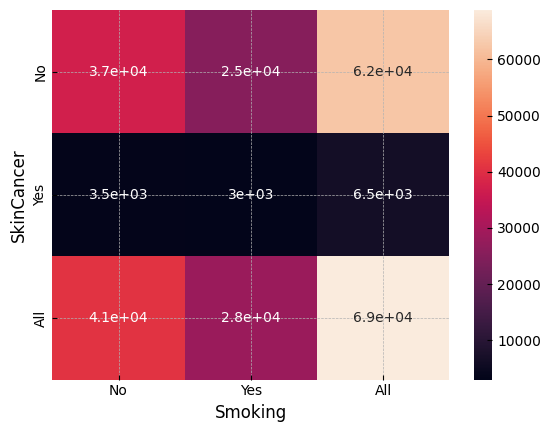

In [27]:
sns.heatmap(contingency_skincancer_smoking, annot = True)
plt.show()

In [28]:
# More analysis with contingency tables
from scipy.stats import chi2_contingency

# the 'c' and 'dof' entries here we won't worry about
# but we do care about:
# 1. the p-value of the test
# 2. the expected frequencies
c, p, dof, expected = chi2_contingency(contingency_skincancer_smoking)

# The lower the p value, the more different from
# random the data.
# As a rule of thumb we say the 
# difference is significant if p < 0.05.
# ("significant at the p=0.05 threshold")
print('The p value is {0:.3f}'.format(p))

# This tells us the difference between the observed
# and "expected at random" frequencies
res = (contingency_skincancer_smoking - expected)


type(res)

The p value is 0.000


pandas.core.frame.DataFrame

In [63]:
#getting the p values

list_to_graph = []
names_for_graph = []
p_val_list = []

for i in range(len(df.columns)-1):
    #for j in range(i+1,len(df.columns)):
    # Look at every combination of columns
    

    
    
    A = df.columns[i]
    B = 'SkinCancer'
    if type(df.loc[0,A]) == str:
        # But here just string (text) 
        # columns for categorical data

        contingency = pd.crosstab(df[A], df[B])
        
        
        names_for_graph.append(A)
       
        
        c, p, dof, expected = chi2_contingency(contingency)
        
        p_val_list.append(p)
        
        
  
        list_to_graph.append((contingency-expected))

        if p < 0.05:
            print('{0} and {1} have p = {2:.4f}'.format(A,B,p))
        else:
            print('\t\t\t\tNOT:',A)

# There are lots of combinations with low p!
# Sometimes this happens by random chance,
# but as a general rule we can infer something
# interesting (or obvious) is happening here

HeartDisease and SkinCancer have p = 0.0000
Smoking and SkinCancer have p = 0.0000
AlcoholDrinking and SkinCancer have p = 0.0080
Stroke and SkinCancer have p = 0.0000
DiffWalking and SkinCancer have p = 0.0000
Sex and SkinCancer have p = 0.0011
AgeCategory and SkinCancer have p = 0.0000
Race and SkinCancer have p = 0.0000
Diabetic and SkinCancer have p = 0.0000
				NOT: PhysicalActivity
GenHealth and SkinCancer have p = 0.0000
				NOT: Asthma
KidneyDisease and SkinCancer have p = 0.0000


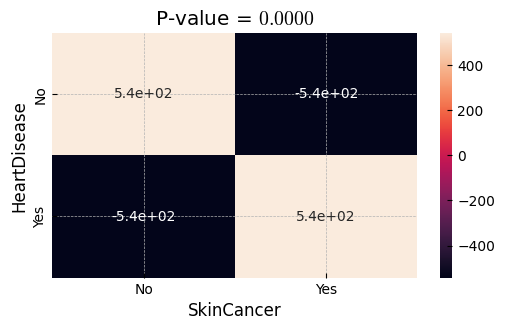

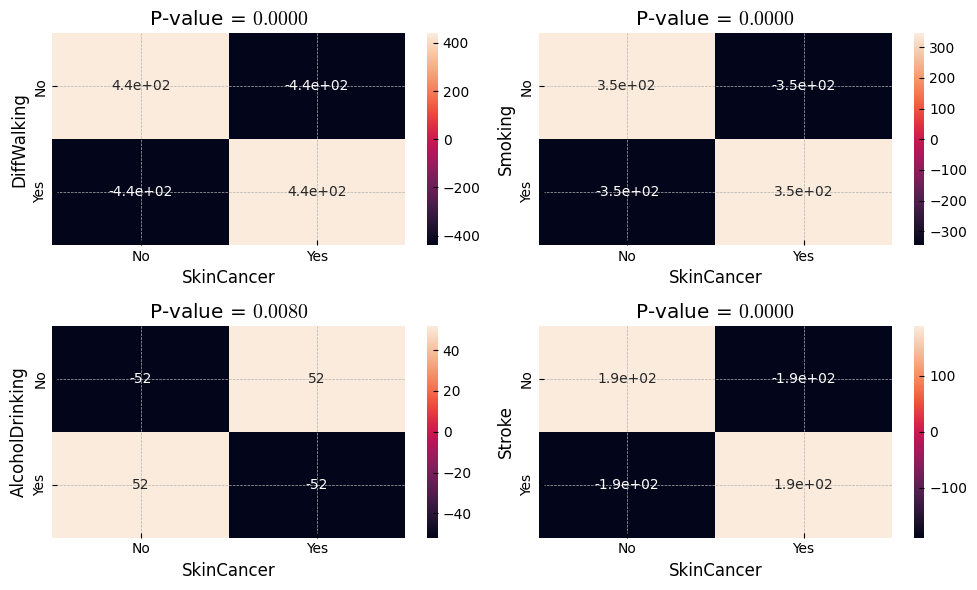

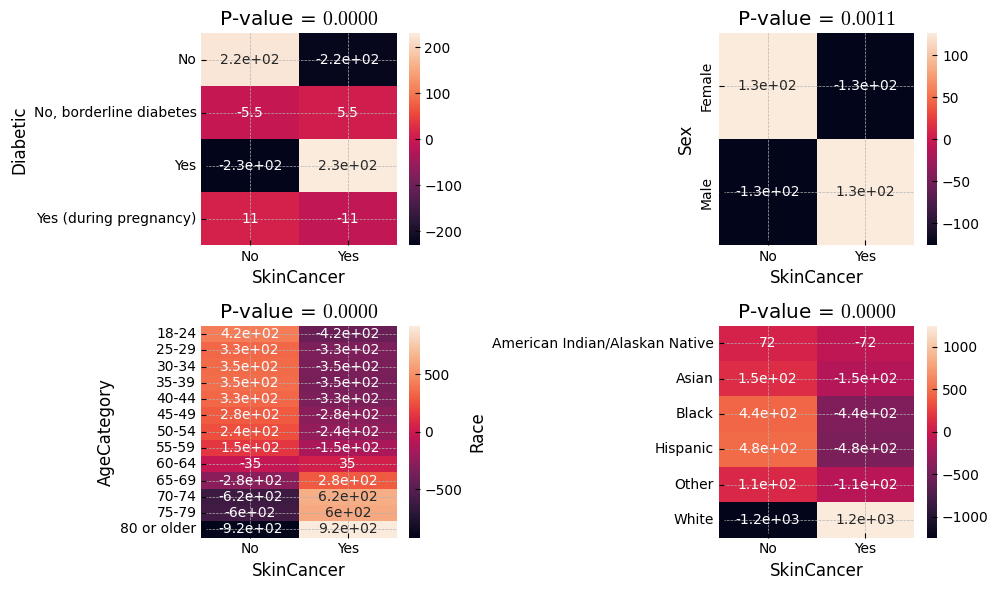

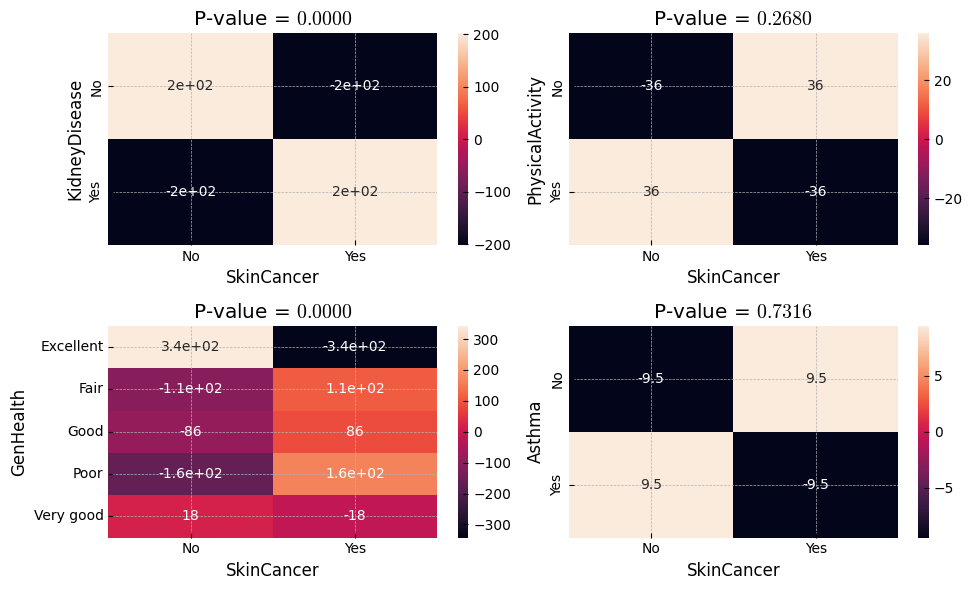

<Figure size 1000x600 with 0 Axes>

In [78]:
FIGURE_SIZE_LENGTH = 10
FIGURE_SIZE_HEIGHT = 6

plt.figure(1, figsize = (FIGURE_SIZE_LENGTH,FIGURE_SIZE_HEIGHT))

for i, res in enumerate(list_to_graph):
    

  
    
   
    plt.subplot(2,2,i % 4 + 1)
    
    plt.title('P-value = ${0:.4f}$'.format(p_val_list[i]))
    
    sns.heatmap(res, annot = True) 
    
    plt.tight_layout()

    if i % 4 == 0 :
        plt.show(1)
        plt.figure(i//4 + 1,figsize = (FIGURE_SIZE_LENGTH,FIGURE_SIZE_HEIGHT))
        
plt.show()
 

# Cancer tumor benign vs Malignant 
dataset from Kaggle https://www.kaggle.com/datasets/erdemtaha/cancer-data  

In [418]:

df = pd.read_csv('cancer_data.csv')

df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


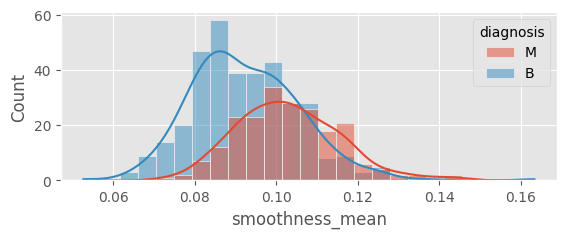

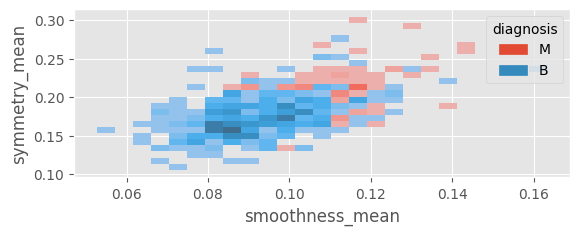

In [407]:
ax1 = plt.subplot(211)

sns.histplot(df, x ='smoothness_mean', hue = 'diagnosis', kde = True, ax = ax1)
plt.show()

#ax2
ax2 = plt.subplot(212)
sns.histplot(df, x ='smoothness_mean',y='symmetry_mean', hue = 'diagnosis', kde = False, ax = ax2)
plt.show()



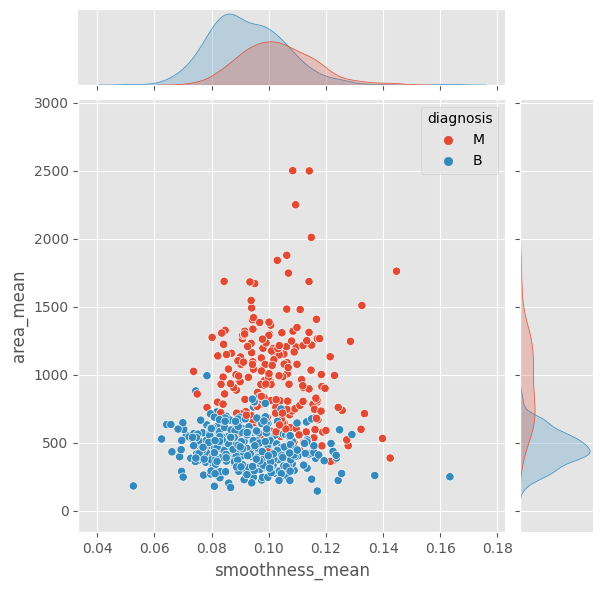

In [426]:

sns.jointplot(data=df, x="smoothness_mean", y="area_mean", hue="diagnosis")
plt.show()

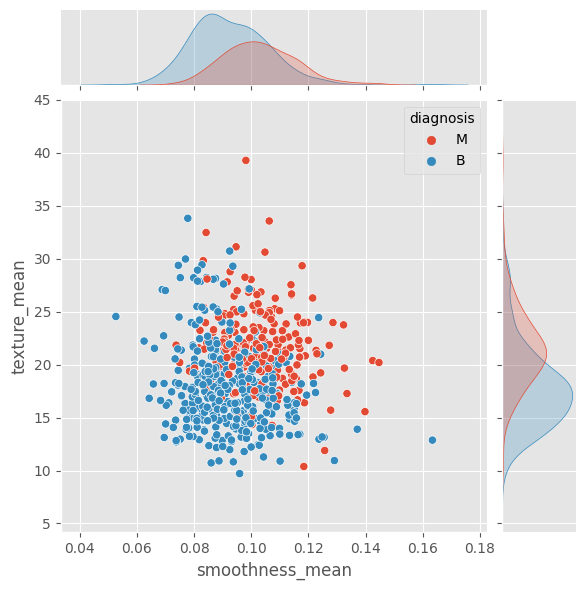

In [423]:

sns.jointplot(data=df, x="smoothness_mean", y="texture_mean", hue="diagnosis")
plt.show()





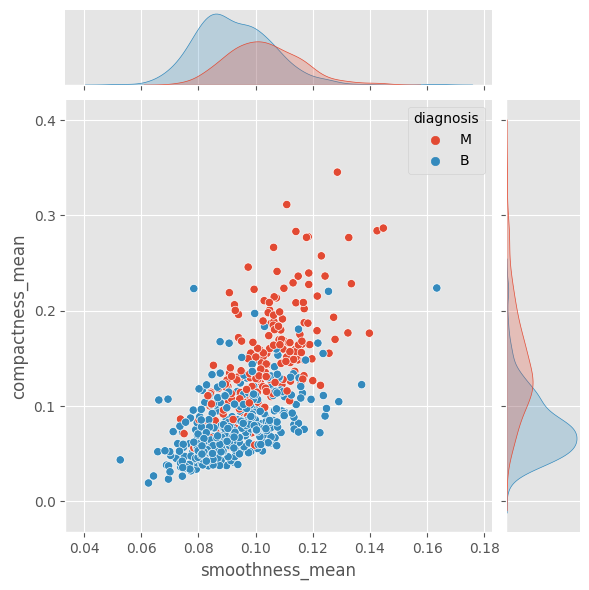

In [425]:

sns.jointplot(data=df, x="smoothness_mean", y="compactness_mean", hue="diagnosis")
plt.show()

In [452]:
m_df = df[df['diagnosis']=='M']
b_df = df[df['diagnosis']=='B']

m_vals = m_df['smoothness_mean'].values
b_vals = b_df['smoothness_mean'].values



In [454]:
statistic, pvalue = stats.f_oneway(m_vals,b_vals)

In [458]:
print("After running a one way ANOVA test on the smoothness between benign and malignant tumors we get a statistically significant p-value of {:.4f} and a statistic of {:.4f}".format(pvalue, statistic))

After running a one way ANOVA test on the smoothness between benign and malignant tumors we get a statistically significant p-value of 0.0000 and a statistic of 83.6511


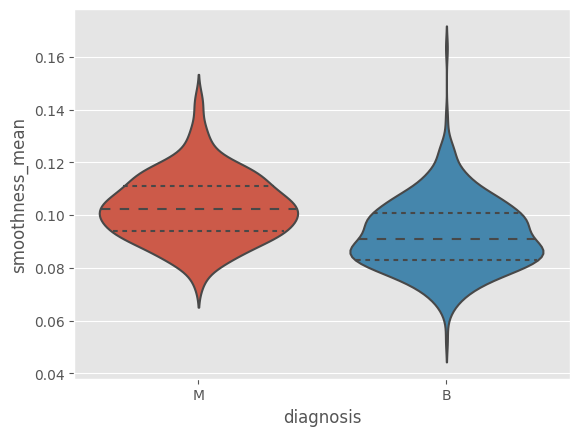

In [476]:
sns.violinplot(df,y = 'smoothness_mean', x= 'diagnosis', inner = 'quart')
plt.show()